In [5]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [103]:
class classification(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(classification, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.out = torch.nn.Linear(n_hidden, n_output)

    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.out(x)
        x = F.softmax(x, dim=1)
        return x

In [104]:
# Create data
input_size = 5
num_samples = 100
num_class = 2

inputs = torch.randn(num_samples, input_size)
labels = torch.LongTensor(num_samples).random_(0, num_class)

In [105]:
# Define net model
hidden_size = 5

model = classification(input_size, hidden_size, num_class)
print(model)

classification(
  (hidden): Linear(in_features=5, out_features=5, bias=True)
  (out): Linear(in_features=5, out_features=2, bias=True)
)


In [106]:
# Define the loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [107]:
# Train the network
num_epoch = 2000
losses = []

for epoch in range(num_epoch):
    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    losses.append(loss.item())

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 200 == 0:
        print (f'Epoch [{epoch+1}/{num_epoch}], Loss: {loss.item():.4f}')



Epoch [200/2000], Loss: 0.7134
Epoch [400/2000], Loss: 0.6955
Epoch [600/2000], Loss: 0.6852
Epoch [800/2000], Loss: 0.6793
Epoch [1000/2000], Loss: 0.6757
Epoch [1200/2000], Loss: 0.6731
Epoch [1400/2000], Loss: 0.6709
Epoch [1600/2000], Loss: 0.6689
Epoch [1800/2000], Loss: 0.6669
Epoch [2000/2000], Loss: 0.6648


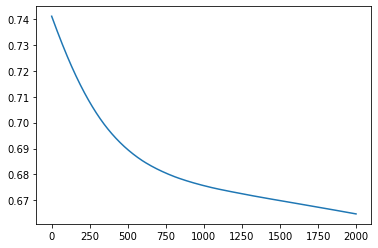

In [108]:
plt.plot(losses)